# Matplotlib——高级图

图是用来更好的解释数据

目标：让老板或客户印象深刻，一目了然

    1. 饼状图
    2. 柱状图
    3. 散点图
    4. 概率图
    5. 组合图
    6. 三维数据图
    7. 图像
    8. 美化

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. 饼状图

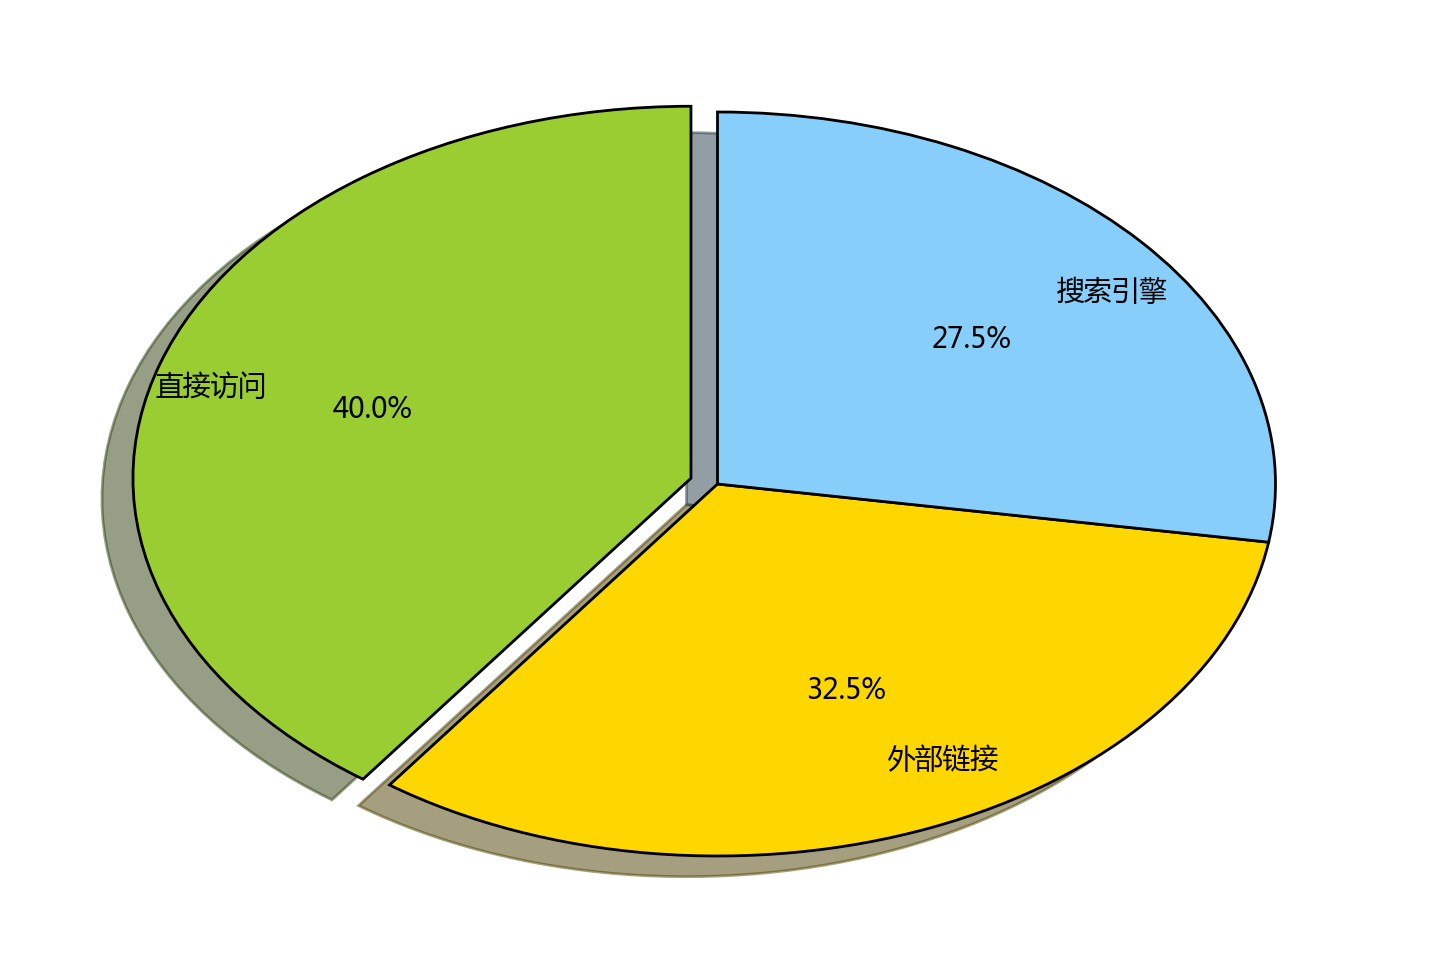

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

# The slices will be ordered and plotted counter-clockwise.
labels = [u'直接访问', u'外部链接', u'搜索引擎']
sizes = [160, 130, 110]
colors = ['yellowgreen', 'gold', 'lightskyblue']

#explode 爆炸出来
explode = (0.05, 0.0, 0.0)  

patches, l_texts, p_texts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, labeldistance=0.8,
        autopct='%3.1f%%', shadow=True, startangle=90, pctdistance=0.6)

# 设置x，y轴刻度一致，这样饼图才能是圆的
#plt.axis('equal')
#plt.legend()

"""
for t in l_texts:
    t.set_size(20)

for t in p_texts:
    t.set_size(20)
"""
plt.show()

## 2. 柱状图

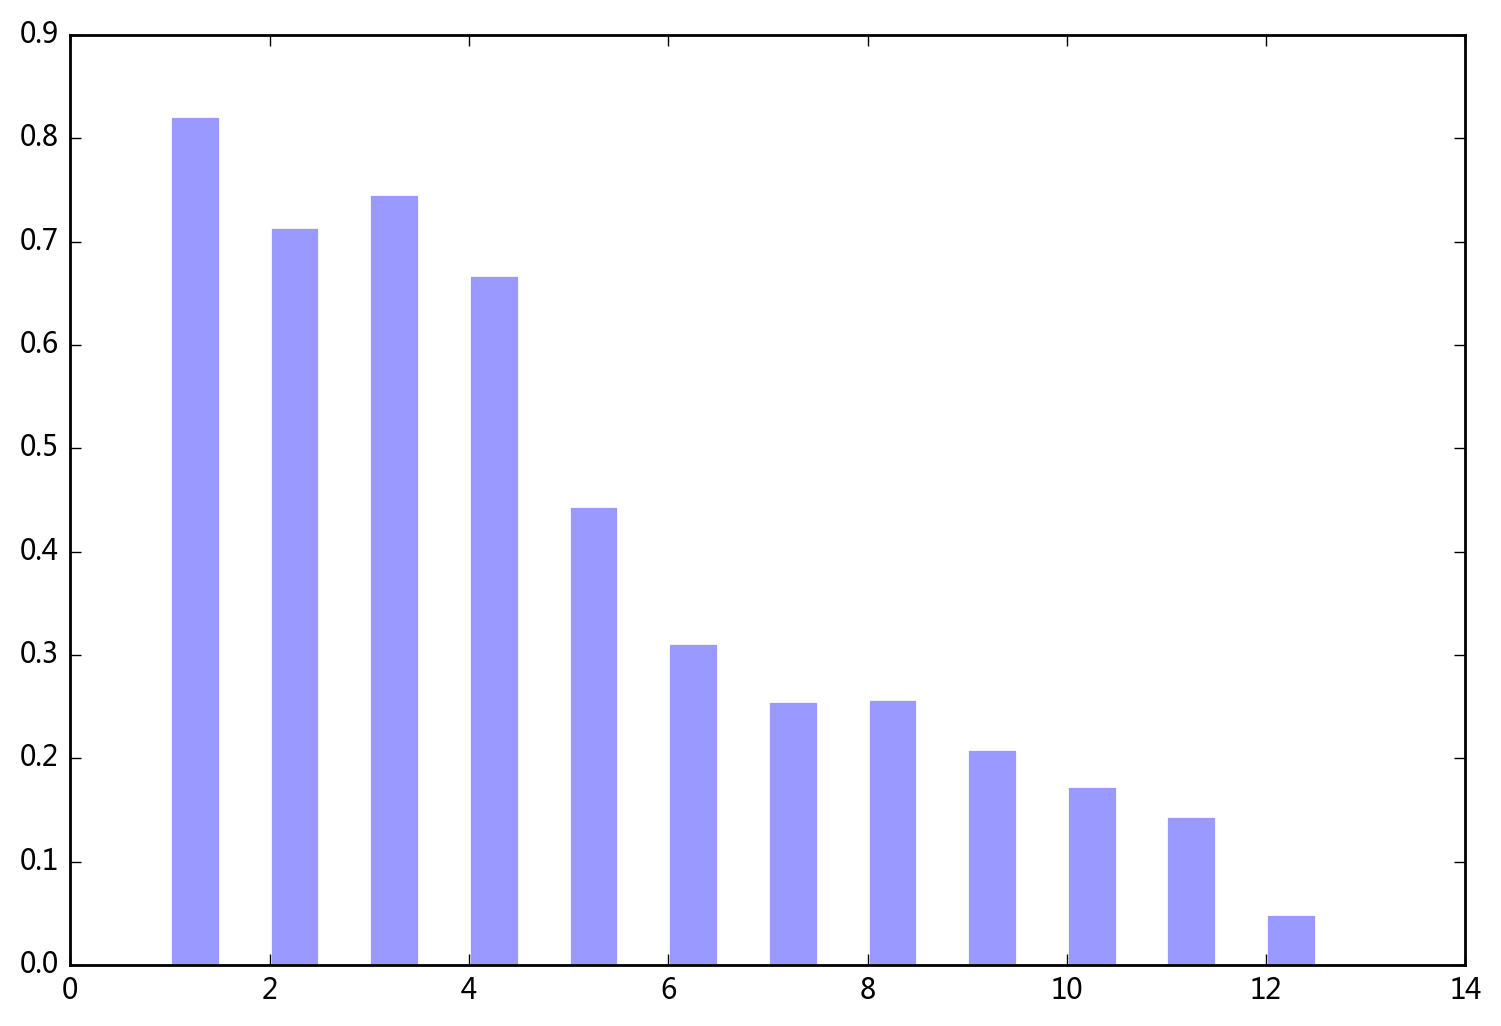

In [4]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(9,6))

n = 12
X = np.arange(n)+1
# numpy.random.uniform(low=0.0, high=1.0, size=None), normal
Y1 = (1-X/float(n+1)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n+1)) * np.random.uniform(0.5,1.0,n)

# bar and barh
width = 0.5
plt.bar(X, Y1, width=width, facecolor='#9999ff', edgecolor='white')
#plt.bar(X, -Y2, width=width, facecolor='#ff9999', edgecolor='white')

"""
for x,y in zip(X,Y1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
    
for x,y in zip(X,-Y2):
    plt.text(x+0.4, y-0.15, '%.2f' % y, ha='center', va= 'bottom')
"""

#plt.ylim(-1.25,+1.25)
plt.show()

## 3. 散点图

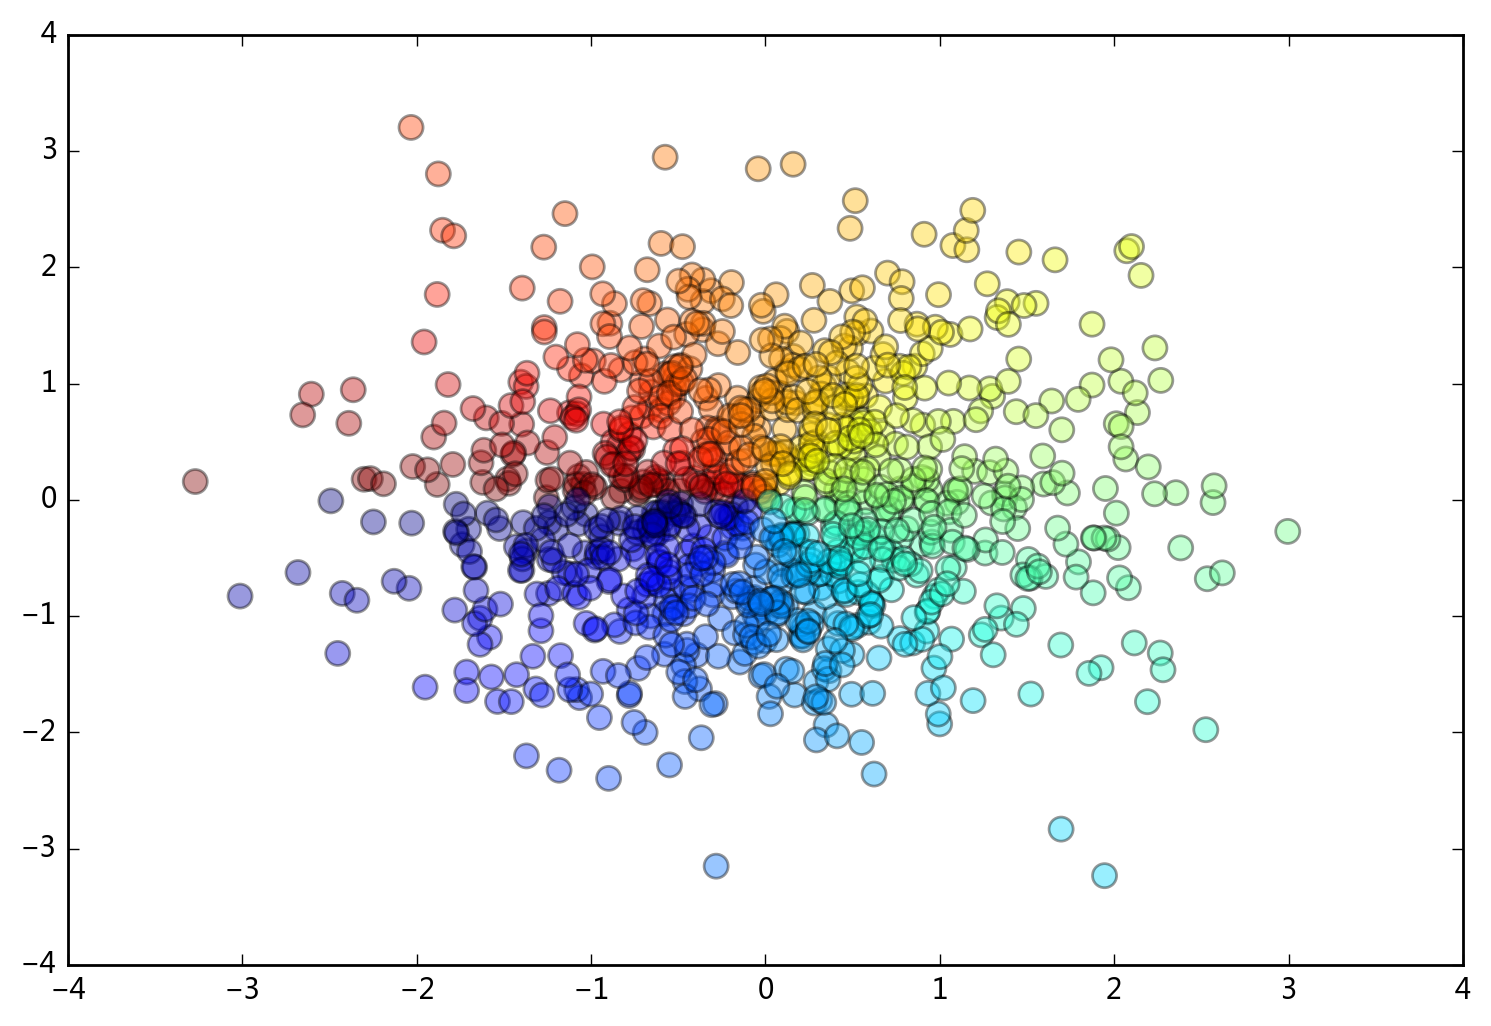

In [5]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(9,6))

n = 1024

# rand 和 randn
X = np.random.randn(1,n)
Y = np.random.randn(1,n)

T = np.arctan2(Y,X)

plt.scatter(X,Y, s=75, c=T, alpha=.4, marker='o')

#plt.xlim(-1.5,1.5), plt.xticks([])
#plt.ylim(-1.5,1.5), plt.yticks([])

plt.show()

## 4. 概率分布

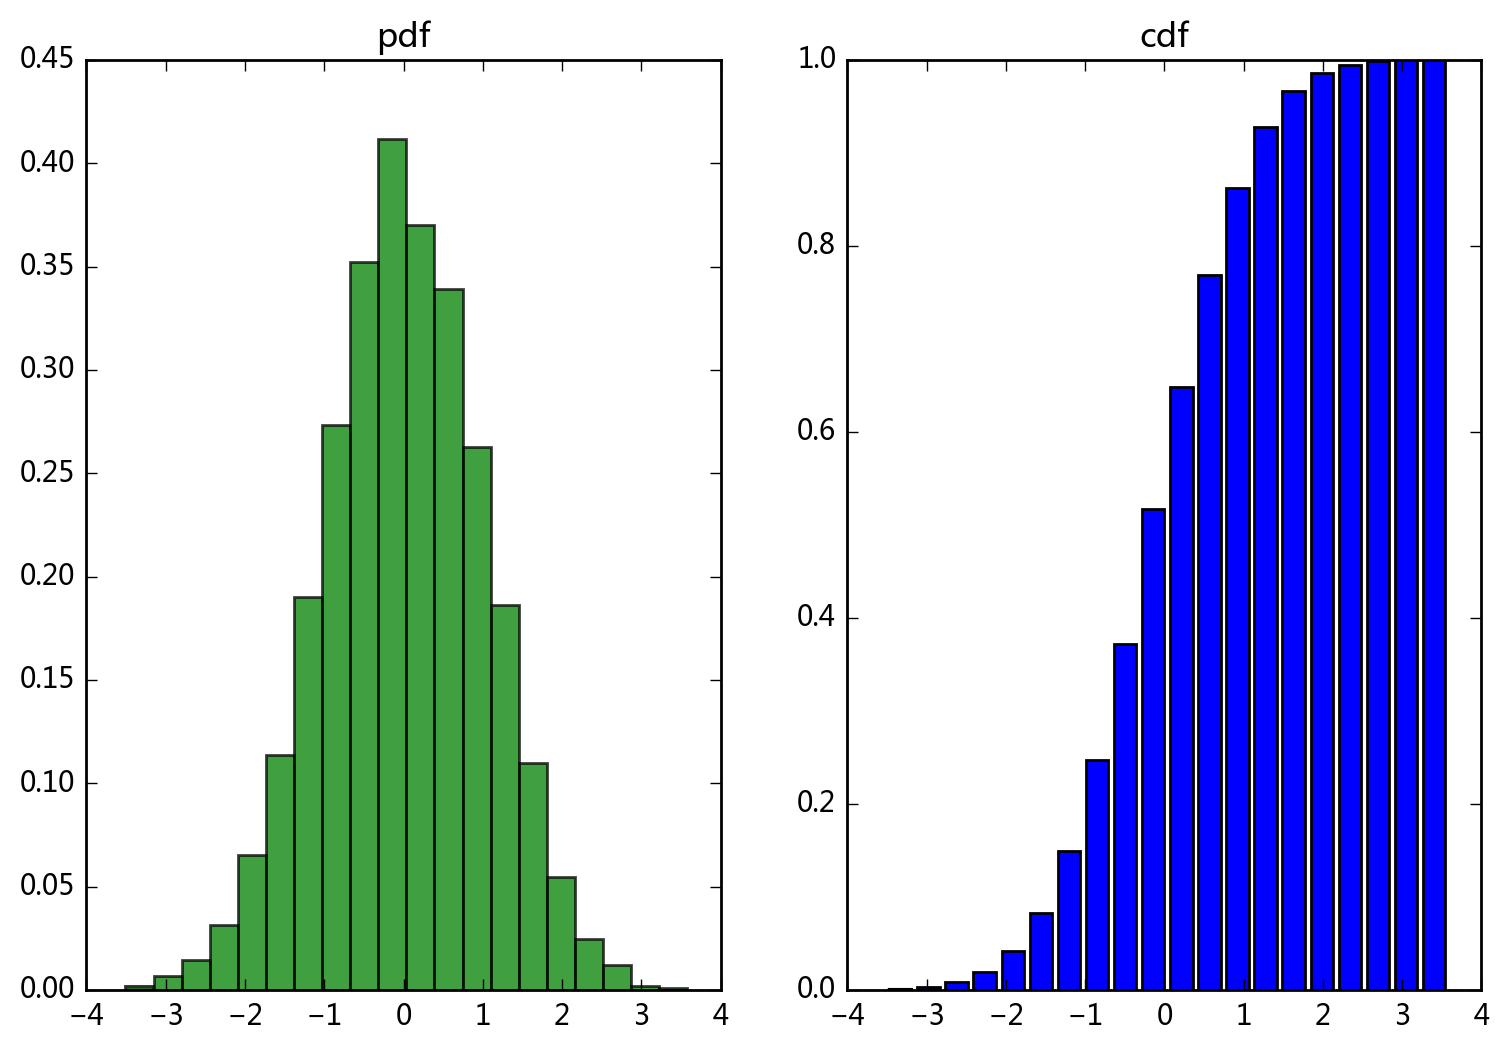

In [6]:
from matplotlib import pyplot as plt
import numpy as np

mu = 0
sigma = 1
x = mu + sigma*np.random.randn(10000)

fig,(ax0,ax1)=plt.subplots(ncols=2, figsize=(9,6))

ax0.hist(x, 20, normed=1, histtype='bar', facecolor='g', alpha=0.75)
ax0.set_title('pdf')

ax1.hist(x, 20, normed=1, histtype='bar', rwidth=0.8, cumulative=True)
ax1.set_title('cdf')

plt.show()

## 5.组合图

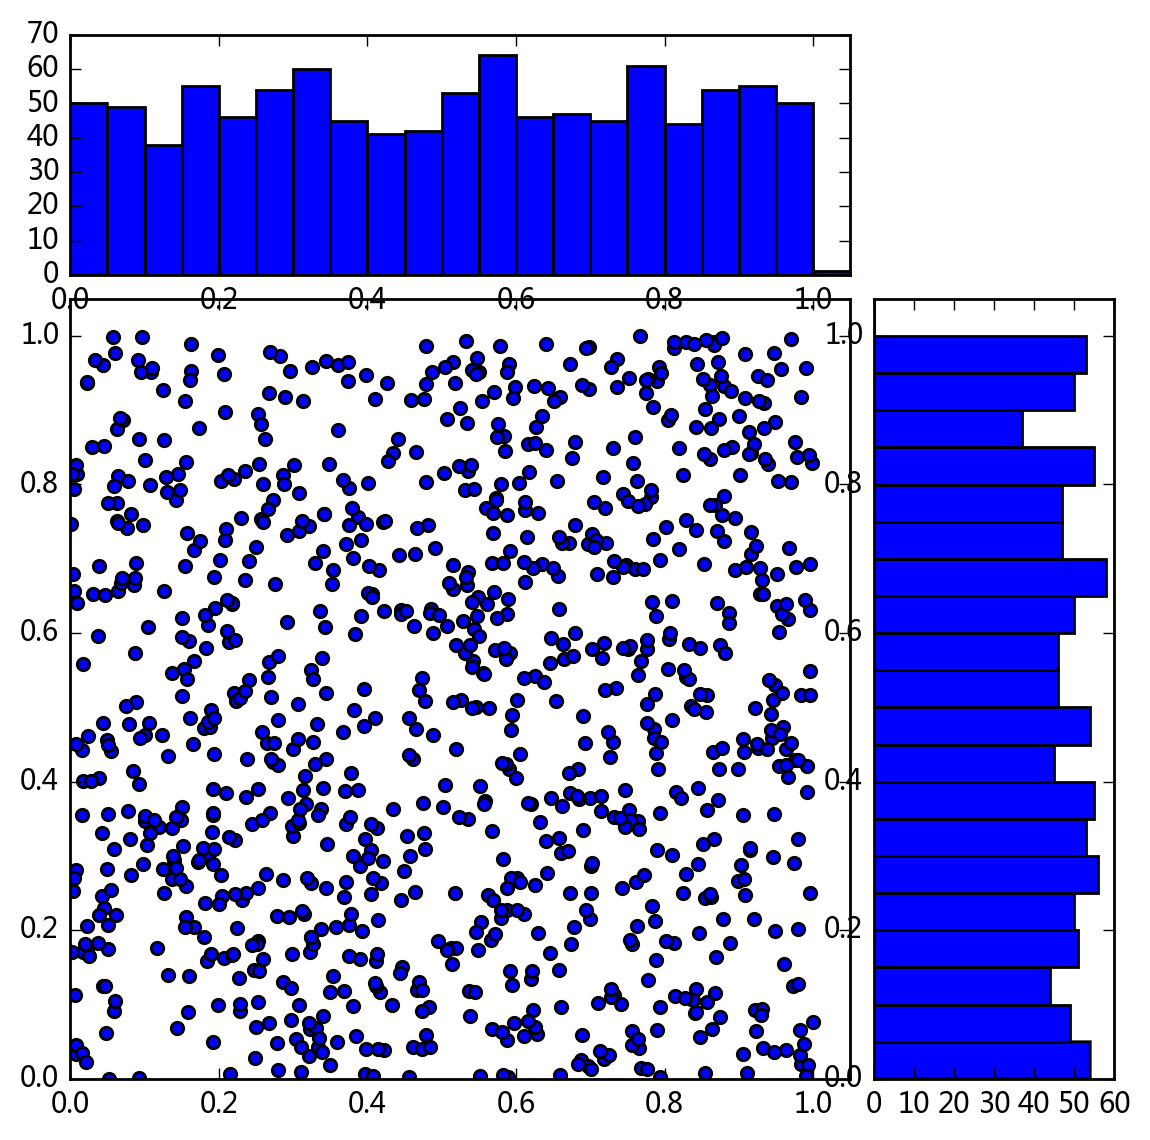

In [7]:
# ref : http://matplotlib.org/examples/pylab_examples/scatter_hist.html

import numpy as np
import matplotlib.pyplot as plt

# the random data
x = np.random.rand(1000)
y = np.random.rand(1000)

# 定义子图区域
left, bottom = 0.1, 0.1
width, height = 0.65, 0.65
left_h = left + width + 0.02
bottom_h = bottom + height + 0.02

# 左下角坐标x,y,加宽高w,h组成list[x,y,w,h]
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

plt.figure(1, figsize=(6, 6))

# 根据子图区域来生成子图
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
#axHistx.xaxis.set_ticks([])
#axHisty.yaxis.set_ticks([])

# now determine nice limits by hand:
N_bins=20
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
binwidth = xymax/N_bins
lim = (int(xymax/binwidth) + 1) * binwidth
nlim = 0#-lim
bins = np.arange(nlim, lim + binwidth, binwidth)

# 画散点图，概率分布图
axScatter.scatter(x, y)
axScatter.set_xlim((nlim, lim))
axScatter.set_ylim((nlim, lim))

axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

# 共享刻度
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

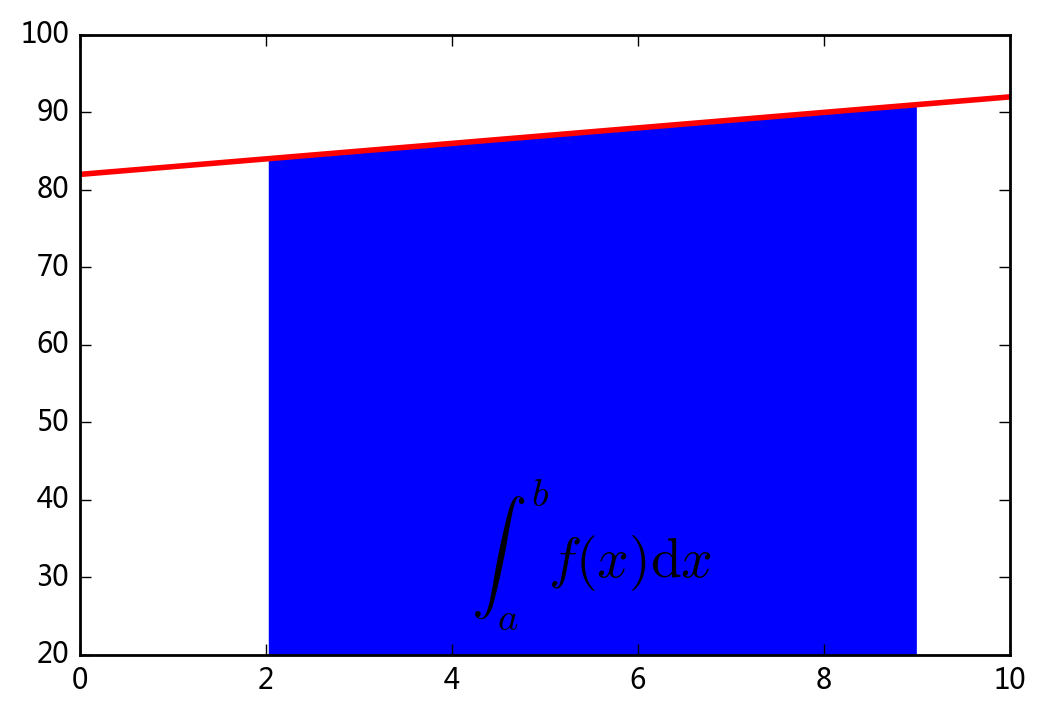

In [8]:
# ref http://matplotlib.org/examples/showcase/integral_demo.html
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return (x - 3)  +85

a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

# 画线
fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
#plt.ylim(ymin=0)

# 画阴影区域
xf = x[np.where((x>a)&(x<b))]
plt.fill_between(xf, np.ones(len(xf))*20, func(xf), color='blue', alpha=1)

# 画文本
plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.show()

## 6. 三维数据图

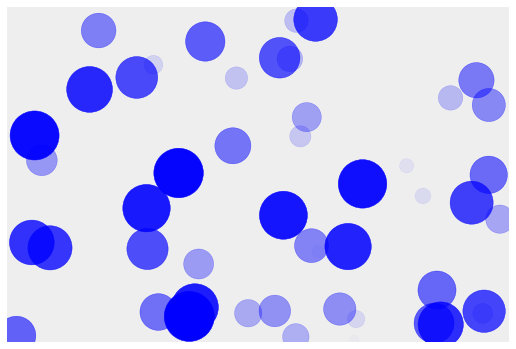

In [64]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,6),facecolor='white')

# 泡泡数量
n = 50
size_min = 50
size_max = 50*50

# 泡泡位置
P = np.random.rand(n,2)

# 泡泡边界颜色 R,G,B,A
C = np.ones((n,4)) * (0,0,1,1)
# A: Alpha color channel  0:完全透明 1:完全不透明
C[:,3] = np.linspace(0,1,n)

# 泡泡大小
S = np.linspace(size_min, size_max, n)

# 散点图
plt.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors=C)

plt.xlim(0,1), plt.xticks([])
plt.ylim(0,1), plt.yticks([])

plt.show()

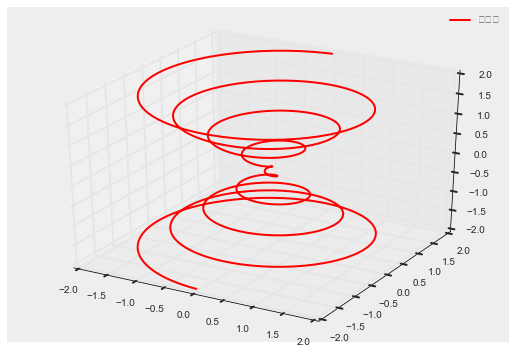

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111,projection='3d')

z = np.linspace(-2, 2, 1000)
r = z
x = r * np.sin(np.pi*4*z)
y = r * np.cos(np.pi*4*z)

ax.plot(x, y, z, label=u'螺旋线', c='r')
ax.legend()

# dpi每英寸长度的点数
#plt.savefig('3d_fig.png',dpi=200)
plt.show()

3d画图种类很多，可参考：http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

其他种类图可参考：http://matplotlib.org/gallery.html

## 7. 图像

(225, 400, 4)
(225, 400)


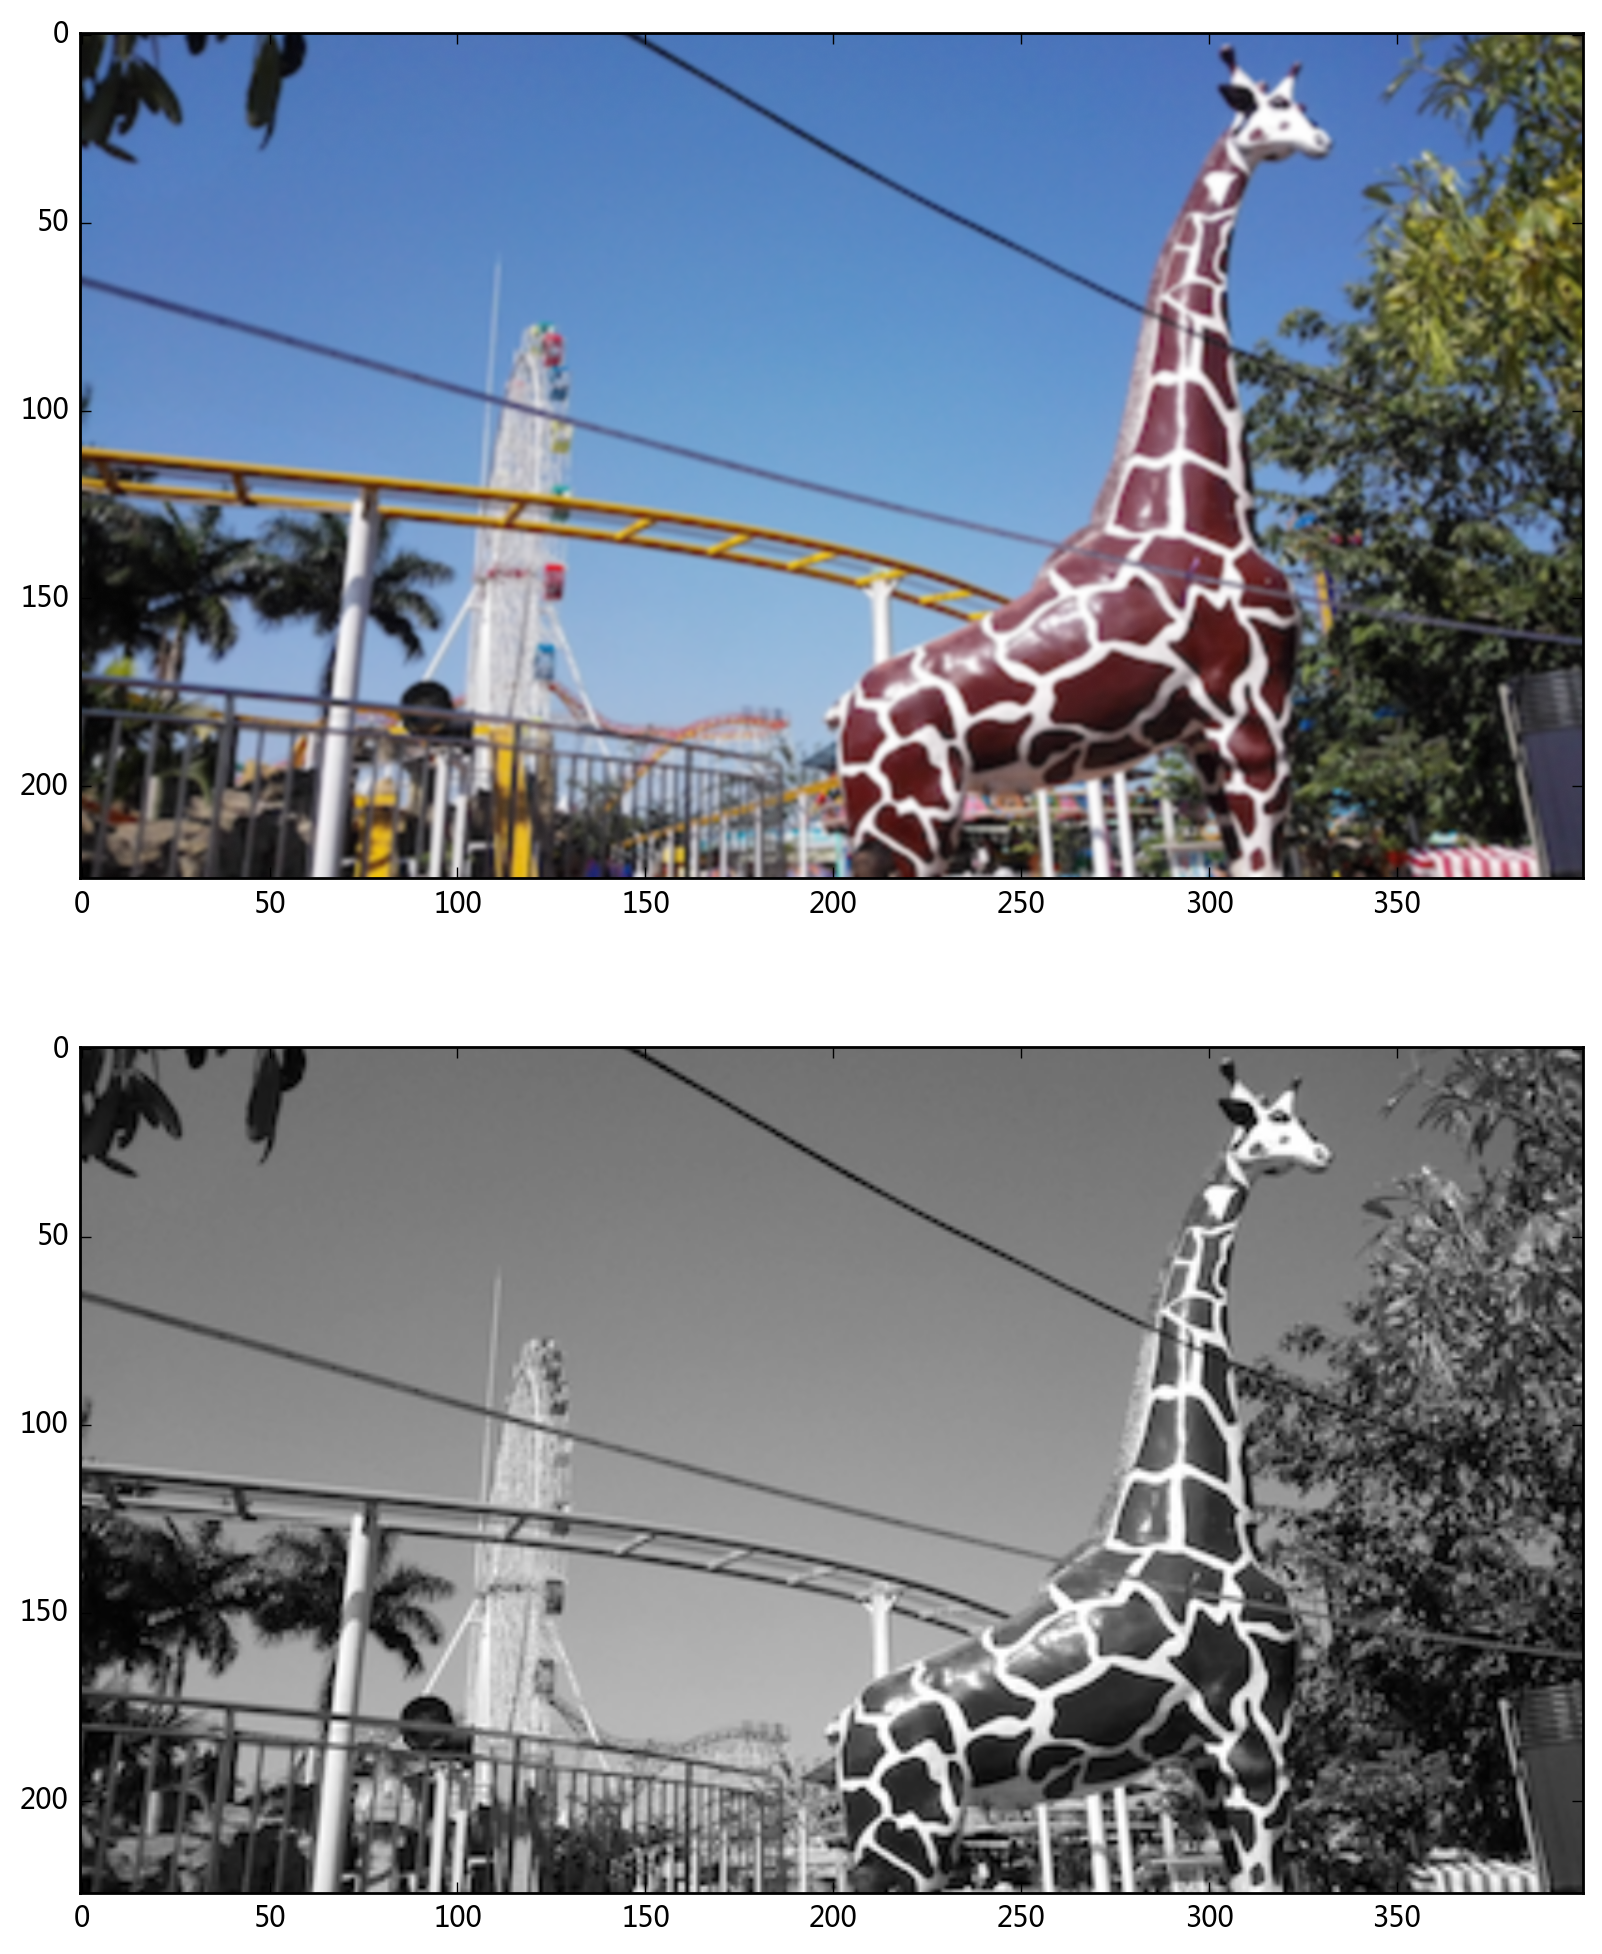

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('test_imshow.png')
print im.shape
imgray=im[:,:,0]*0.299+im[:,:,1]*0.587+im[:,:,2]*0.114
print imgray.shape

fig = plt.figure(figsize=(10,12))
ax0=fig.add_subplot(211)
ax1=fig.add_subplot(212)

ax0.imshow(im,interpolation='bicubic') # none,bicubic,bilinear,nearest
ax1.imshow(imgray,cmap="gray")

## 8. 美化

In [11]:
import seaborn as sns

ImportError: No module named seaborn

In [10]:
print plt.style.available #ggplot, bmh, dark_background, fivethirtyeight, grayscale
plt.style.use('bmh')

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


# 作业二

2.4 我有一个私人数据，《用python做些事》2015-7~12月加入用户的部分信息。我想让大家帮我统计一下从这个数据里我能了解哪些信息。

<table class="table table-bordered">
   <tr><td>订单ID</td><td>金额</td><td>方式</td><td>订单时间</td></tr>
   <tr>
       <td>1214693</td>
       <td>18</td>
       <td>支付宝 / IAP ...</td>
       <td>8/31/2015 18:41</td>
   </tr>
</table>